In [1]:
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.4 anndata==0.11.1 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.0 igraph==0.11.5 pynndescent==0.5.12


In [2]:
nr = sc.read_h5ad('./V1_NR_L23_filter.h5ad')
dr = sc.read_h5ad('./V1_DR_L23_filter.h5ad')

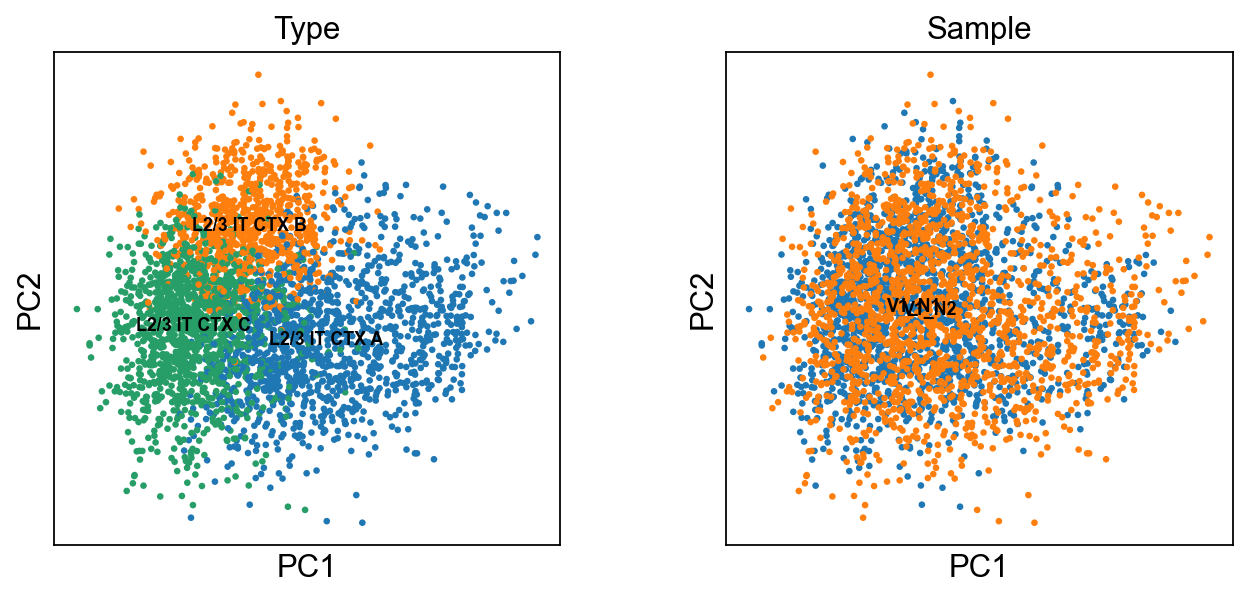

In [3]:
sc.pl.pca(nr,color=["Type","Sample"],legend_fontsize=8,legend_loc="on data")

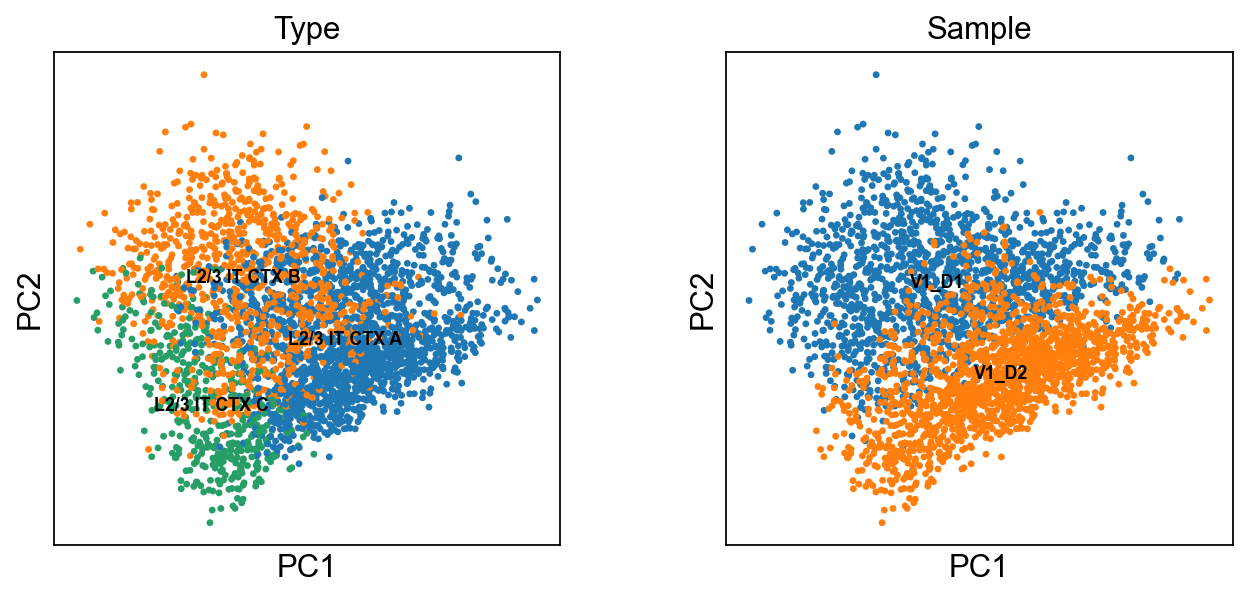

In [4]:
sc.pl.pca(dr,color=["Type","Sample"],legend_fontsize=8,legend_loc="on data")

In [5]:
nr

AnnData object with n_obs × n_vars = 3376 × 22105
    obs: 'n_genes', 'n_counts', 'doublet_score', 'Class', 'preclass', 'cluster', 'Subclass', 'Sample', 'Type', 'Subtype', 'Cell_annotation'
    var: 'gene_ids', 'feature_types', 'n_cells-V1_N1', 'highly_variable-V1_N1', 'means-V1_N1', 'dispersions-V1_N1', 'dispersions_norm-V1_N1', 'n_cells-V1_N2', 'highly_variable-V1_N2', 'means-V1_N2', 'dispersions-V1_N2', 'dispersions_norm-V1_N2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Class_colors', 'Sample_colors', 'Subclass_colors', 'Subtype_colors', 'Type_colors', 'cluster_colors', 'hvg', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'neighbors', 'pca', 'preclass_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [3]:
import anndata 
from scipy.stats import zscore
from scipy import sparse 
import itertools
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from umap import UMAP
from py_pcha import PCHA
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances_argmin
import seaborn as sns

In [2]:
import seaborn as sns

In [5]:
hvg_nr = nr[:, nr.var.highly_variable]
hvg_dr = dr[:, dr.var.highly_variable]

In [8]:
hvg_dr

View of AnnData object with n_obs × n_vars = 3166 × 3197
    obs: 'n_genes', 'n_counts', 'doublet_score', 'Class', 'preclass', 'cluster', 'Class_new', 'Subclass', 'Sample', 'Type', 'Subtype', 'Cell_annotation', 'X_harmony_1', 'X_harmony_2'
    var: 'gene_ids', 'feature_types', 'n_cells-V1_D1', 'highly_variable-V1_D1', 'means-V1_D1', 'dispersions-V1_D1', 'dispersions_norm-V1_D1', 'n_cells-V1_D2', 'highly_variable-V1_D2', 'means-V1_D2', 'dispersions-V1_D2', 'dispersions_norm-V1_D2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Class_colors', 'Sample_colors', 'Subclass_colors', 'Subtype_colors', 'Type_colors', 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'preclass_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [61]:
hvg_nr

View of AnnData object with n_obs × n_vars = 3376 × 2584
    obs: 'n_genes', 'n_counts', 'doublet_score', 'Class', 'preclass', 'cluster', 'Subclass', 'Sample', 'Type', 'Subtype', 'Cell_annotation'
    var: 'gene_ids', 'feature_types', 'n_cells-V1_N1', 'highly_variable-V1_N1', 'means-V1_N1', 'dispersions-V1_N1', 'dispersions_norm-V1_N1', 'n_cells-V1_N2', 'highly_variable-V1_N2', 'means-V1_N2', 'dispersions-V1_N2', 'dispersions_norm-V1_N2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Class_colors', 'Sample_colors', 'Subclass_colors', 'Subtype_colors', 'Type_colors', 'cluster_colors', 'hvg', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'neighbors', 'pca', 'preclass_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

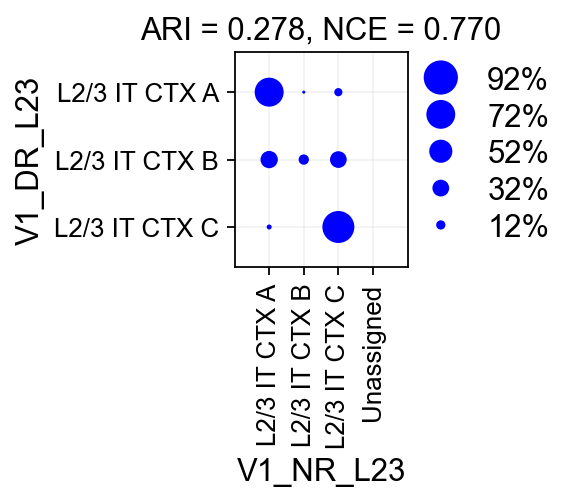

In [66]:
nr_dict = {'L2/3 IT CTX A':0, 'L2/3 IT CTX B':1,'L2/3 IT CTX C':2}
dr_dict = {'L2/3 IT CTX A':0, 'L2/3 IT CTX B':1,'L2/3 IT CTX C':2}


validation_label_train_70nrvsdr, valid_predlabels_train_70nrvsdr, test_labelsnrvsdr, test_predlabelsnrvsdr = tm.xgbclassifier(
    train_anndata = nr,
    test_anndata = dr,
    train_dict = nr_dict,
    test_dict = dr_dict
    )


mappingconfmatnrvsdr, mappingxticksnrvsdr, mappingplotnrvsdr = tm.plotConfusionMatrix(
    ytrue = test_labelsnrvsdr,
    ypred = test_predlabelsnrvsdr,
    type = 'mapping',
    save_as = 'V1_nrvsdr_L23_mapping.pdf',
    title = 'ARI = {:.3f}, NCE = {:.3f}'.format(adjusted_rand_score(labels_true = test_labelsnrvsdr, labels_pred = test_predlabelsnrvsdr), calculateNCE(labels_true = test_labelsnrvsdr, labels_pred = test_predlabelsnrvsdr)),
    xaxislabel = 'V1_NR_L23',
    yaxislabel = 'V1_DR_L23'
    )

ranking genes
    finished: added to `.uns['t-test_bh']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_Type']`


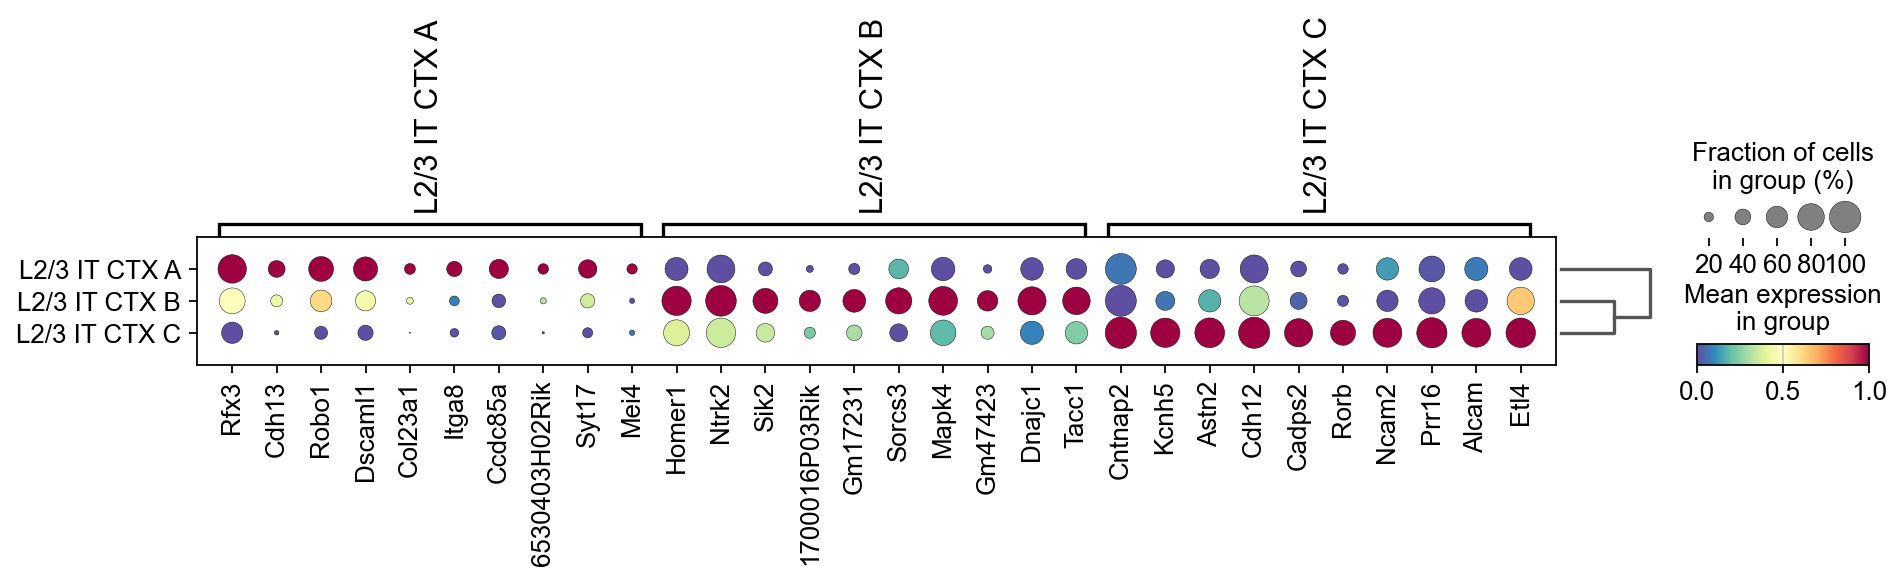

In [95]:
sc.tl.rank_genes_groups(dr, groupby='Type',groups='all', reference='rest', method='t-test',pts=True,corr_method='benjamini-hochberg',key_added='t-test_bh')
sc.pl.rank_genes_groups_dotplot(dr, n_genes=10,groupby='Type',cmap='Spectral_r', standard_scale='var',key='t-test_bh',min_logfoldchange=1)

In [96]:
dr_a = sc.get.rank_genes_groups_df(dr, group="L2/3 IT CTX A",key='t-test_bh', pval_cutoff=0.05, log2fc_min=1)
dr_b = sc.get.rank_genes_groups_df(dr, group="L2/3 IT CTX B",key='t-test_bh', pval_cutoff=0.05, log2fc_min=1)
dr_c = sc.get.rank_genes_groups_df(dr, group="L2/3 IT CTX C",key='t-test_bh', pval_cutoff=0.05, log2fc_min=1)

In [98]:
dr_a.to_csv('DR_markergene_A.xls',index=True,sep='\t')
dr_b.to_csv('DR_markergene_B.xls',index=True,sep='\t')
dr_c.to_csv('DR_markergene_C.xls',index=True,sep='\t')

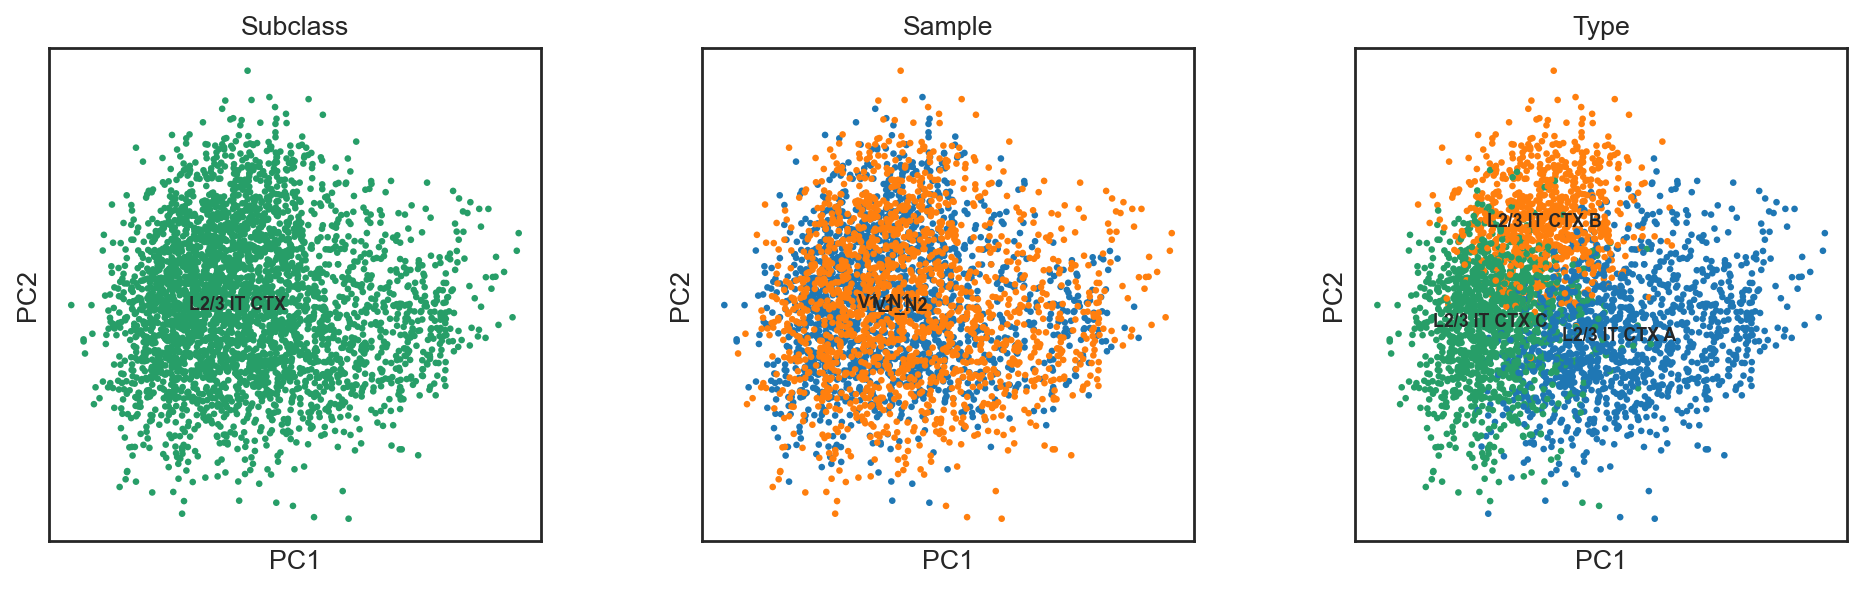

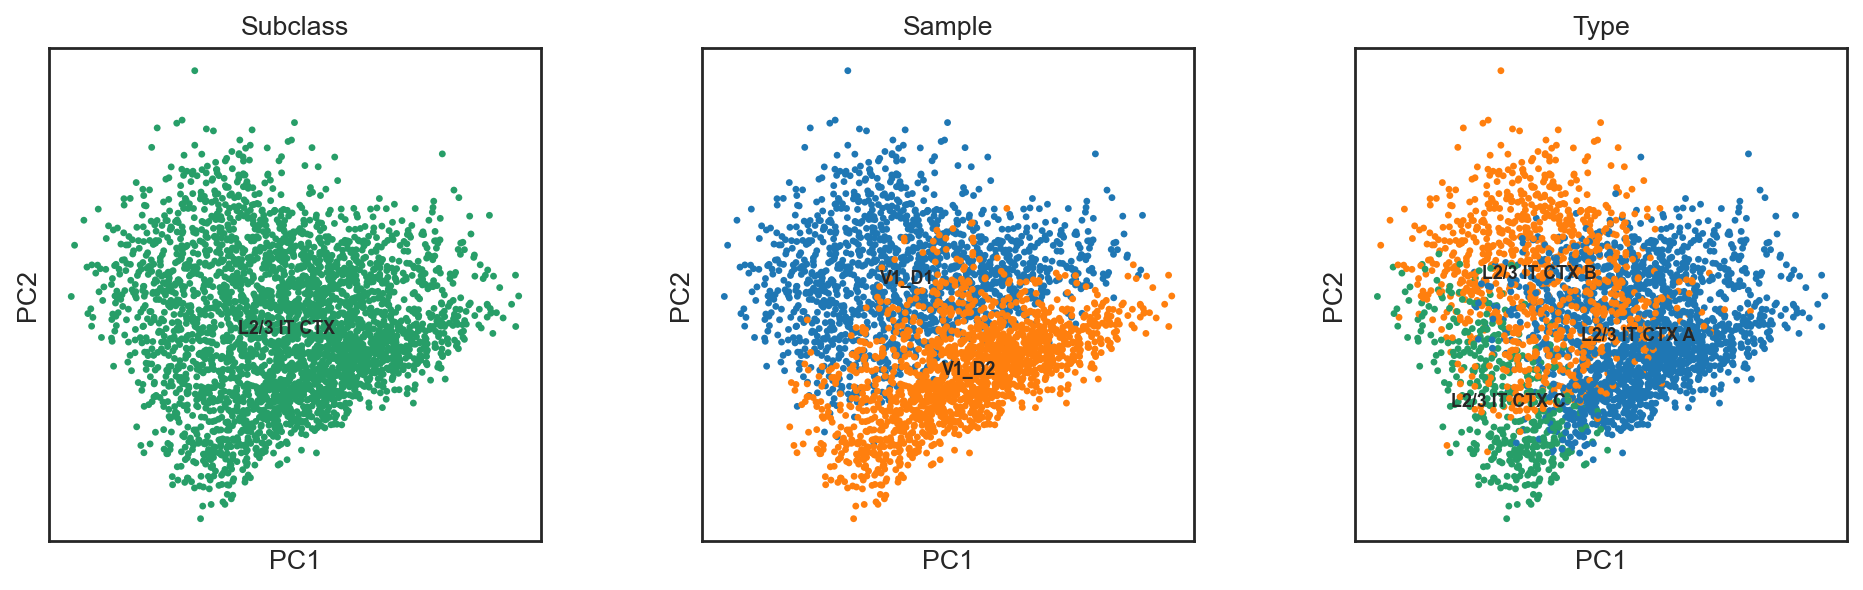

In [75]:
for i in [nr,dr]:
    sc.pl.pca(i,color=["Subclass","Sample","Type"],legend_fontsize=8,legend_loc="on data")

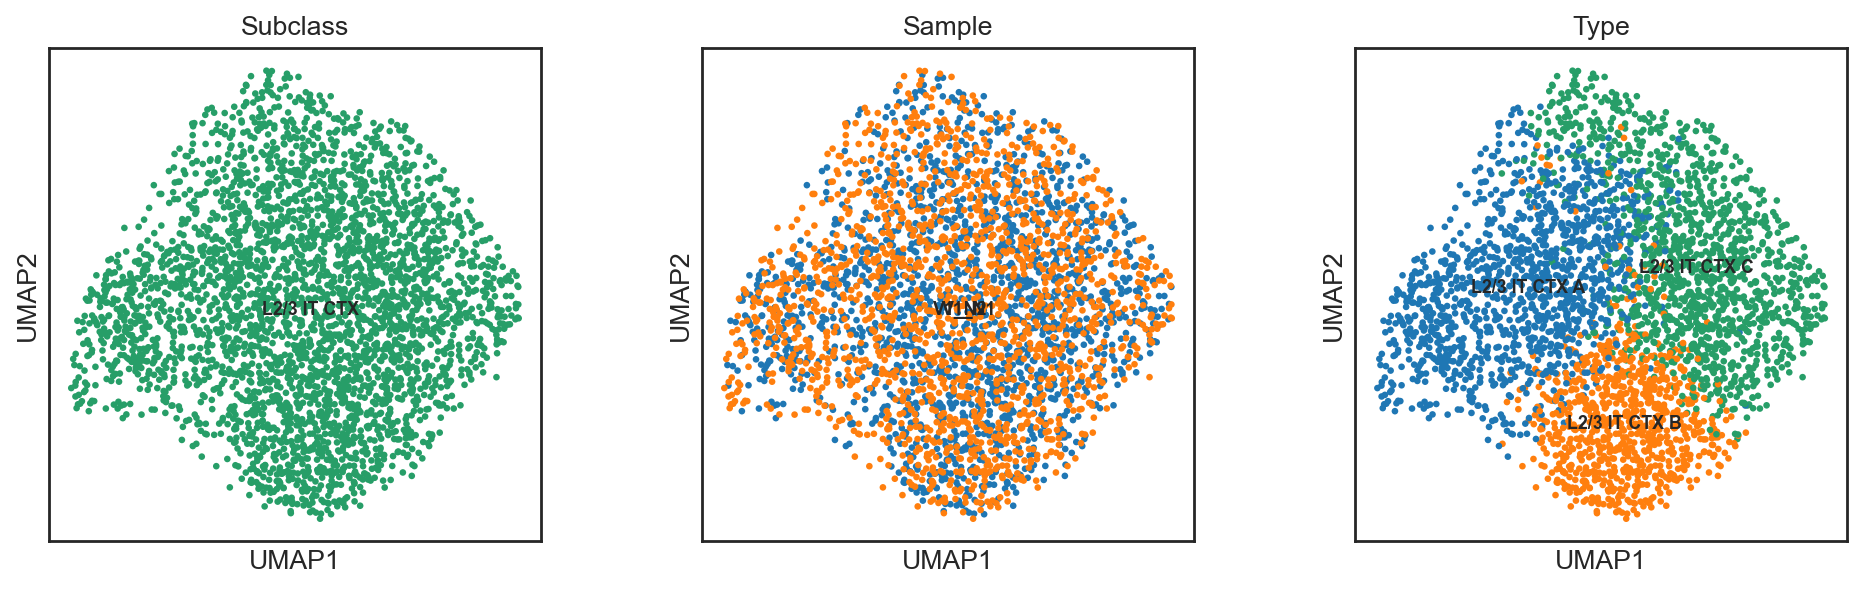

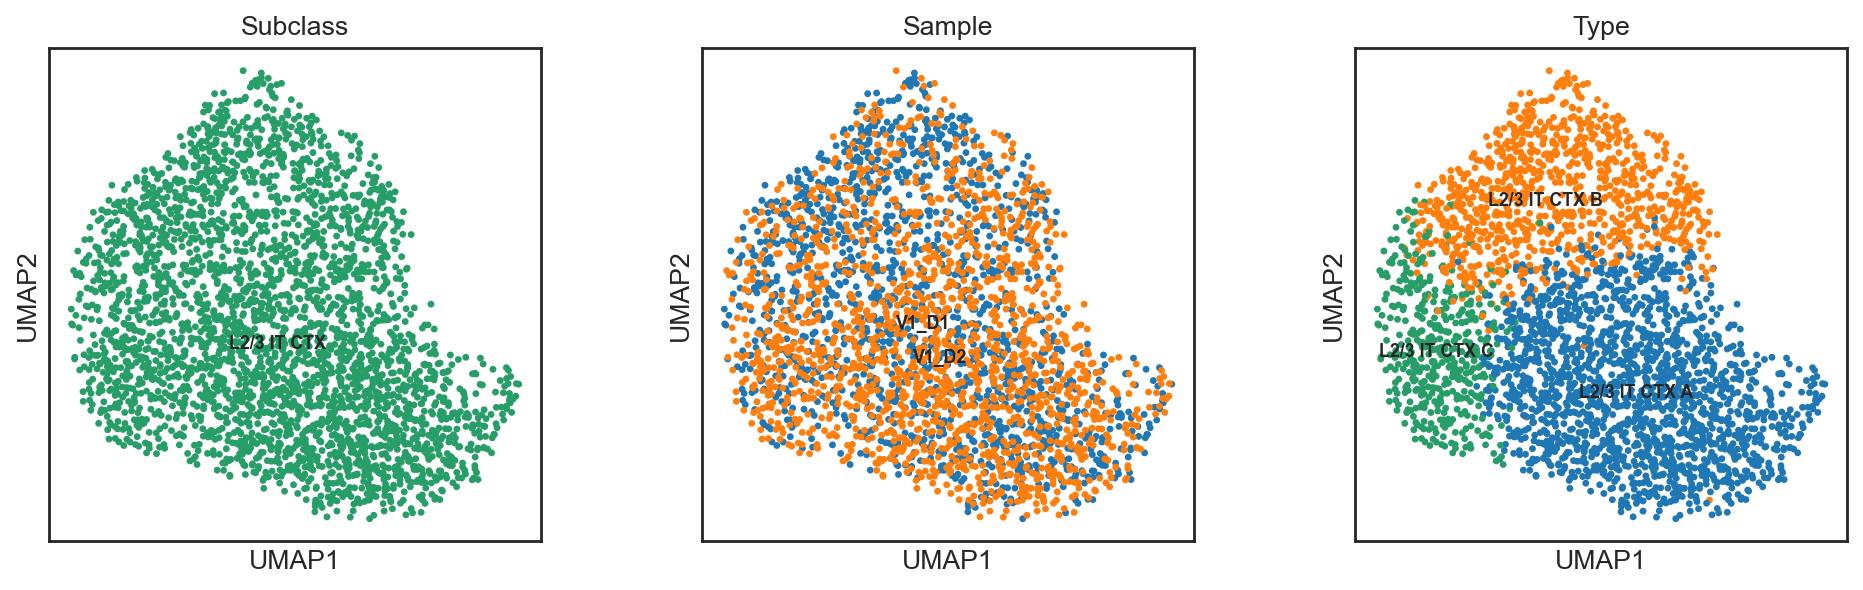

In [77]:
for i in [nr,dr]:
    sc.pl.umap(i,color=["Subclass","Sample","Type"],legend_fontsize=8,legend_loc="on data")

In [13]:
df = pd.read_csv('all_marker_gene_class.txt',sep='\t')

In [14]:
df

Gene        Class Type
0             Rfx3       Common    A
1            Cdh13       Common    A
2            Robo1       Common    A
3          Dscaml1       Common    A
4          Col23a1       Common    A
..             ...          ...  ...
764  4930417H01Rik  NR_specific    C
765        Gm28410  NR_specific    C
766          Susd2  NR_specific    C
767         Pcdhb9  NR_specific    C
768          Ltbp3  NR_specific    C

[769 rows x 3 columns]

In [18]:

# 根据第二个表格的Gene列从第一个表格筛选对应的行
df_with_values = df.copy()  # 保留第二个表格
df_with_values = df_with_values.set_index('Gene')  # 将'Gene'列设为索引，便于与第一个表格匹配

# 将第一个表格的值加入到第二个表格
df_with_values = df_with_values.join(d, how='left')  # 使用join根据索引进行匹配

# 恢复'Gene'为普通列
df_with_values.reset_index(inplace=True)


In [19]:
df_with_values

Gene        Class Type  NR L2/3 IT CTX A  NR L2/3 IT CTX B  \
0    1600020E01Rik  DR_specific    B          0.221009          0.201698   
1    1700016P03Rik  DR_specific    B          0.337082          0.279342   
2    1700063D05Rik  DR_specific    A          0.000900          0.001378   
3    1700087I21Rik  NR_specific    A          0.031273          0.018981   
4    1700121C08Rik  DR_specific    B          0.003545          0.001494   
..             ...          ...  ...               ...               ...   
764          Zfpm1  DR_specific    C          0.051068          0.115958   
765       Zkscan16  DR_specific    A          0.167693          0.175673   
766          Zmat4       Common    C          0.293426          0.285313   
767          Zmiz1       Common    B          0.189472          0.506798   
768         Zswim6  DR_specific    B          0.774996          0.662670   

     NR L2/3 IT CTX C  DR L2/3 IT CTX A  DR L2/3 IT CTX B  DR L2/3 IT CTX C  
0            0.203689          0.256351          0.468425          0.271232  
1            0.473012          0.164696          0.916799          0.337522  
2            0.001107          0.029718          0.012973          0.005204  
3            0.008835          0.022594          0.020359          0.021415  
4            0.008965          0.005429          0.019713          0.003112  
..                ...               ...               ...               ...  
764          0.095441          0.047168          0.071113          0.115654  
765          0.143113          0.270573          0.145865          0.134771  
766          0.523191          0.249708          0.290022          0.633817  
767          0.340987          0.237310          0.461852          0.240979  
768          0.816800          0.699133          1.196254          0.881542  

[769 rows x 9 columns]

In [20]:

df_with_values = df_with_values.sort_values(by=['Class', 'Type'], ascending=[True, True])



In [32]:
df_with_values

NR L2/3 IT CTX A  NR L2/3 IT CTX B  NR L2/3 IT CTX C  \
Class       Type                                                         
Common      A             0.484781          0.191665          0.059863   
            A             0.103736          0.034244          0.060094   
            A             0.120339          0.043370          0.028497   
            A             0.167030          0.126619          0.049898   
            A             0.248017          0.016074          0.025256   
...                            ...               ...               ...   
NR_specific C             0.098927          0.144622          0.231849   
            C             0.000548          0.000000          0.010427   
            C             0.041882          0.114464          0.159056   
            C             0.017536          0.029757          0.050094   
            C             0.106674          0.109337          0.207484   

                  DR L2/3 IT CTX A  DR L2/3 IT CTX B  DR L2/3 IT CTX C  
Class       Type                                                        
Common      A             0.358221          0.140953          0.035144  
            A             0.069006          0.037026          0.023992  
            A             0.190335          0.084804          0.057712  
            A             0.219850          0.108423          0.033200  
            A             0.171745          0.040693          0.042358  
...                            ...               ...               ...  
NR_specific C             0.053667          0.058059          0.071506  
            C             0.001587          0.002359          0.010160  
            C             0.069084          0.145258          0.071536  
            C             0.006942          0.023290          0.002936  
            C             0.100021          0.084426          0.104247  

[769 rows x 6 columns]

In [22]:
df_with_values.fillna(0, inplace=True)


In [24]:
df_with_values.index = list(df_with_values['Gene'])

In [26]:
del df_with_values['Gene']

In [28]:
df_with_values.to_csv('V1_all_marker_class_exp.xls',index=True,sep='\t')

In [30]:
import seaborn as sns
sns.set_theme(style="ticks")

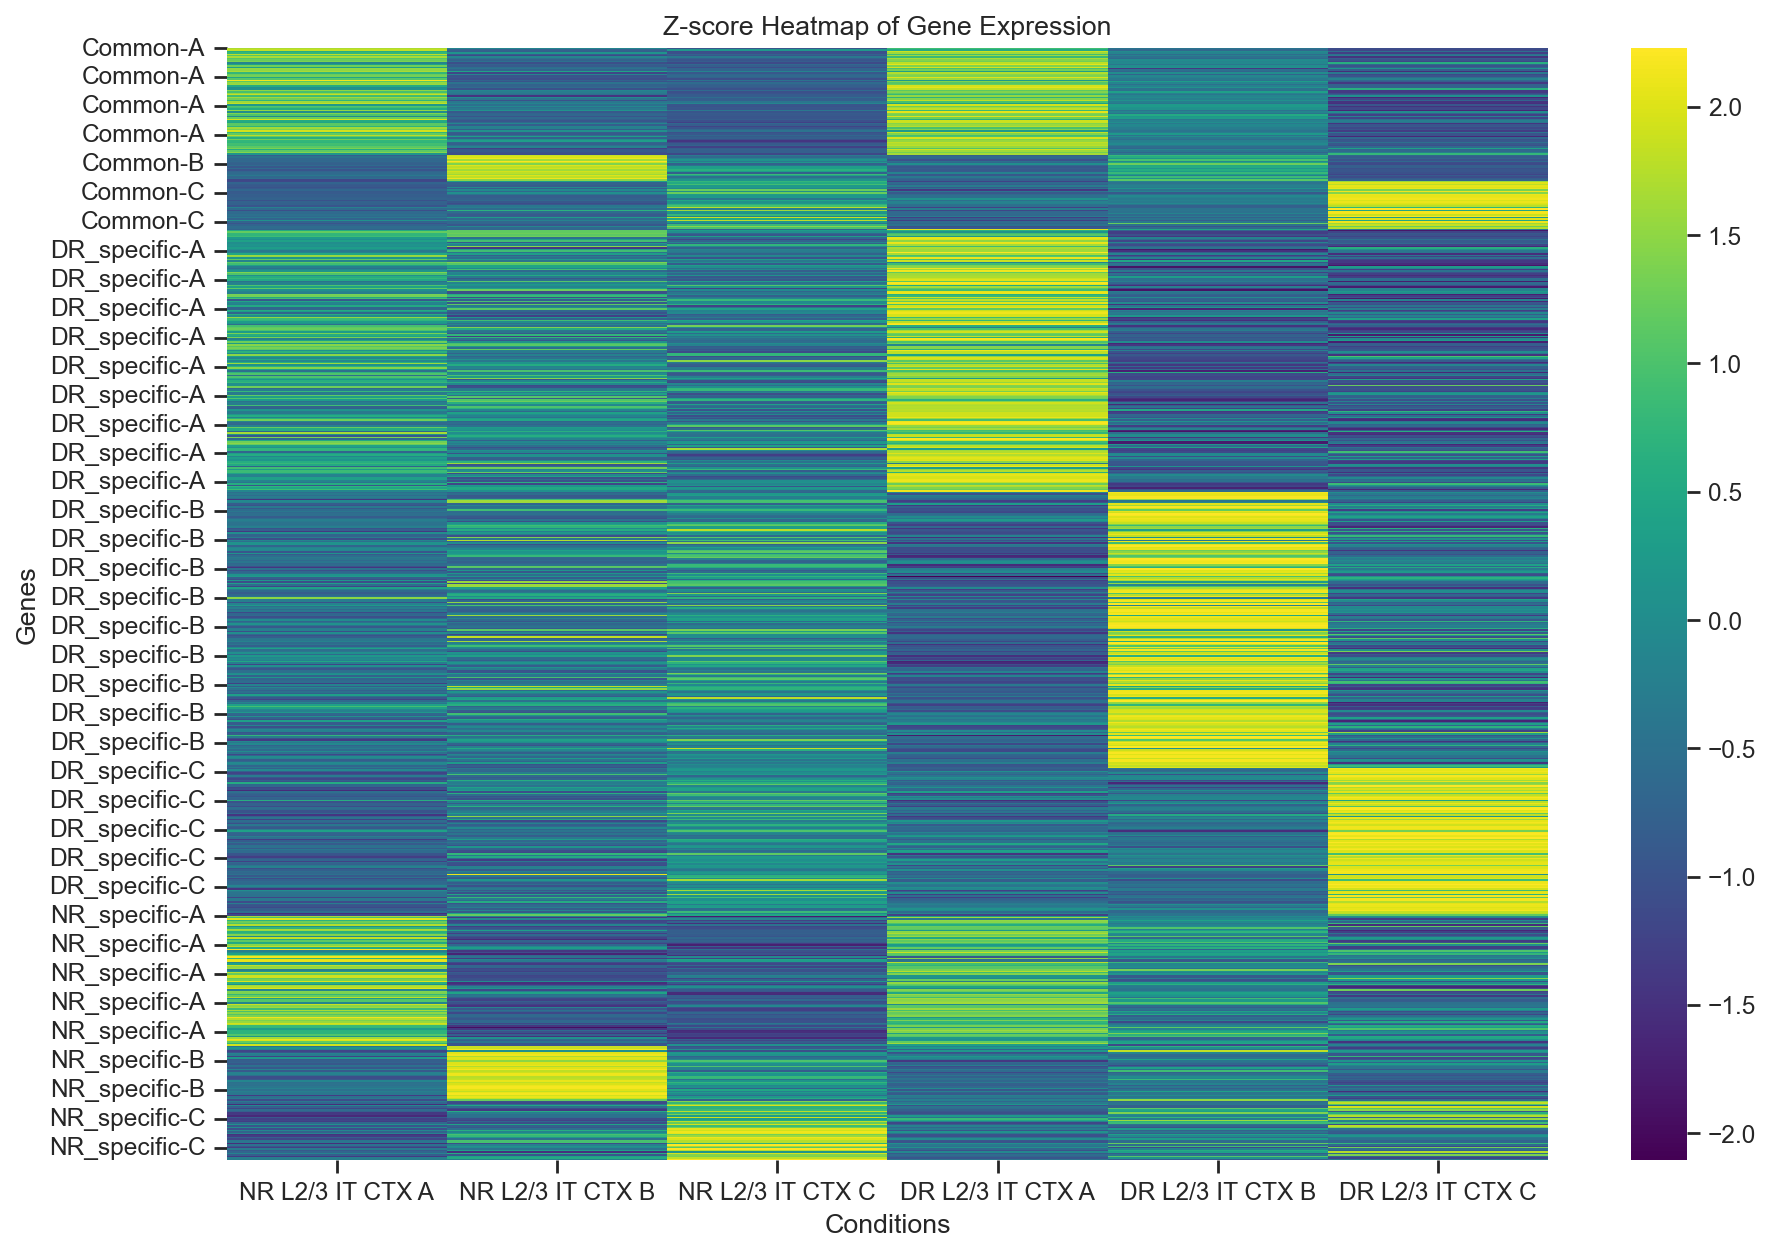

In [36]:

from scipy.stats import zscore

# 计算Z-score，axis=1表示按行计算
df_zscore = df_with_values.apply(zscore, axis=1)

# 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(df_zscore, cmap='viridis', fmt='.2f')
plt.title('Z-score Heatmap of Gene Expression')
plt.xlabel('Conditions')
plt.ylabel('Genes')
plt.tight_layout()

# 显示热图
plt.show()


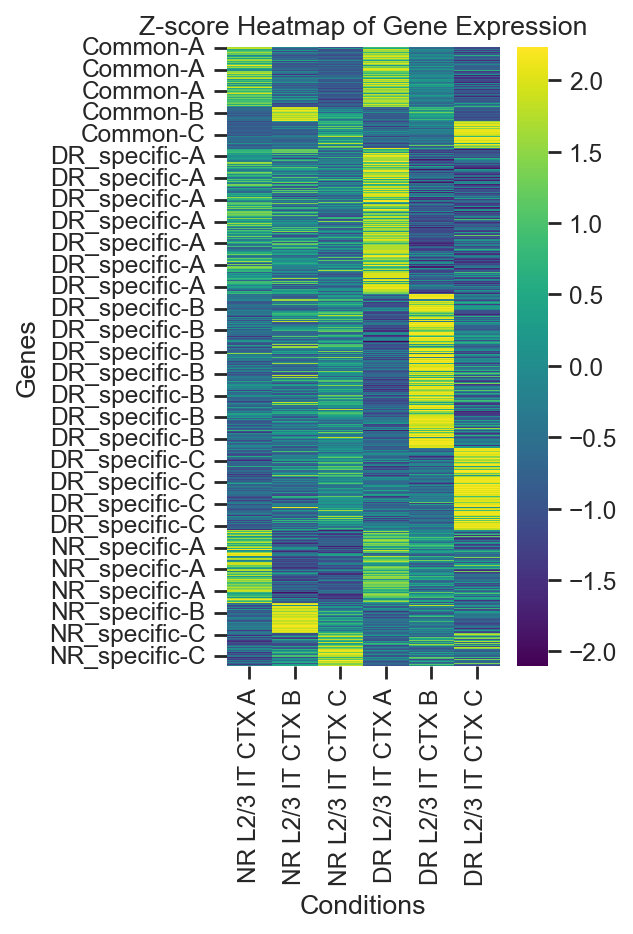

In [39]:
# 绘制热图
plt.figure(figsize=(4, 6))
sns.heatmap(df_zscore, cmap='viridis', fmt='.2f')
plt.title('Z-score Heatmap of Gene Expression')
plt.xlabel('Conditions')
plt.ylabel('Genes')
plt.tight_layout()

# 显示热图
plt.show()

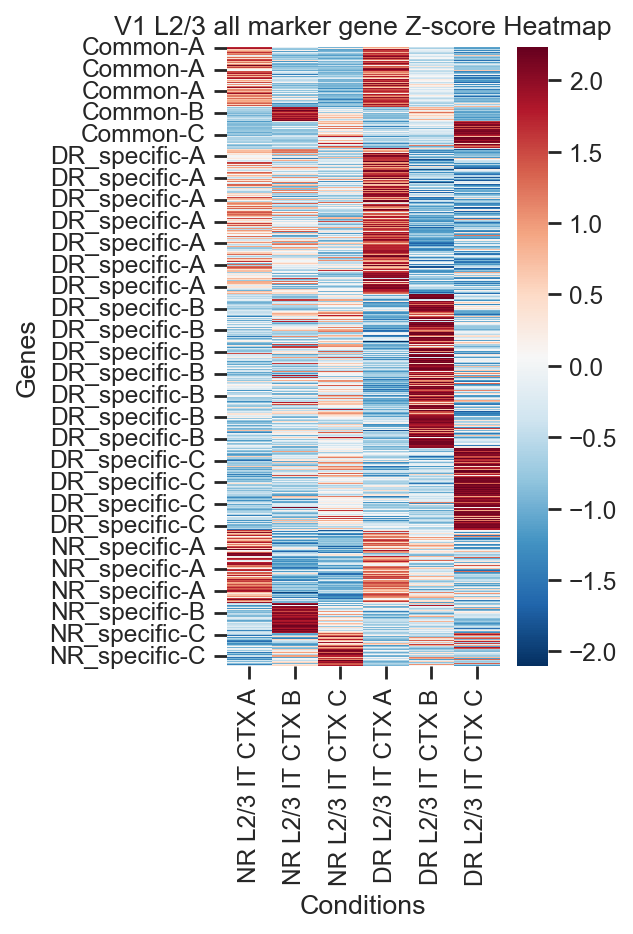

In [115]:
# 绘制热图
plt.figure(figsize=(4, 6))
sns.heatmap(df_zscore, cmap='RdBu_r', fmt='.2f')
plt.title('V1 L2/3 all marker gene Z-score Heatmap')
plt.xlabel('Conditions')
plt.ylabel('Genes')
plt.tight_layout()

# 显示热图
plt.savefig('V1_L23_all_markergene_Z-score_Heatmap.pdf')

In [125]:
nr

AnnData object with n_obs × n_vars = 3376 × 22105
    obs: 'n_genes', 'n_counts', 'doublet_score', 'Class', 'preclass', 'cluster', 'Subclass', 'Sample', 'Type', 'Subtype', 'Cell_annotation'
    var: 'gene_ids', 'feature_types', 'n_cells-V1_N1', 'highly_variable-V1_N1', 'means-V1_N1', 'dispersions-V1_N1', 'dispersions_norm-V1_N1', 'n_cells-V1_N2', 'highly_variable-V1_N2', 'means-V1_N2', 'dispersions-V1_N2', 'dispersions_norm-V1_N2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Class_colors', 'Sample_colors', 'Subclass_colors', 'Subtype_colors', 'Type_colors', 'cluster_colors', 'hvg', 'leiden_res_0.80', 'leiden_res_0.80_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.20', 'leiden_res_1.20_colors', 'neighbors', 'pca', 'preclass_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
sns.set_theme(style="ticks")

(-10.0, 10.0)

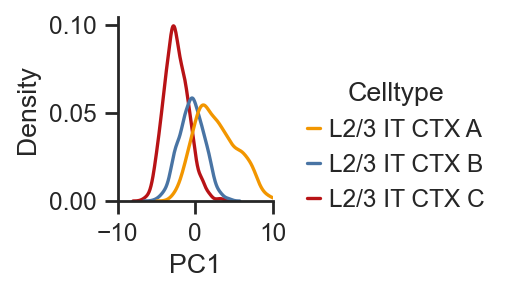

In [7]:
pca = pd.DataFrame(nr.obsm['X_pca'],columns=np.char.add("PC",(1+np.arange(nr.obsm['X_pca'].shape[1])).astype(str)))
df = pd.DataFrame( )
df.index = nr.obs.index
df['PC1'] = list(pca['PC1'])
df['Celltype'] = nr.obs.Type
sns.displot(data=df,x="PC1",hue="Celltype",kind="kde",palette=["#f29600","#4974a4","#b81316"],height=2,aspect=1)
plt.xlim(-10,10)

(-10.0, 10.0)

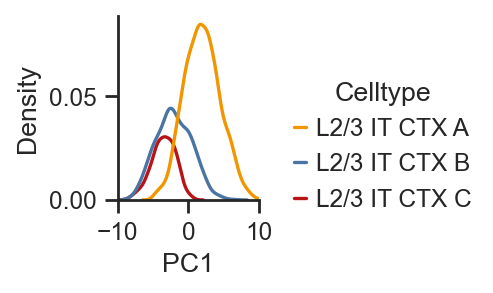

In [8]:
pca = pd.DataFrame(dr.obsm['X_pca'],columns=np.char.add("PC",(1+np.arange(dr.obsm['X_pca'].shape[1])).astype(str)))
df = pd.DataFrame()
df.index = dr.obs.index
df['PC1'] = list(pca['PC1'])
df['Celltype'] = dr.obs.Type
sns.displot(data=df,x="PC1",hue="Celltype",kind="kde",palette=["#f29600","#4974a4","#b81316"],height=2,aspect=1)
plt.xlim(-10,10)